# Exercise: Dimensionality Reduction¶

Based on https://ml-lectures.org/docs/structuring_data/Dimensionality_reduction.html

**To do**



Very often, we are presented with data containing many features, i.e. high dimensional data. The aim of dimensionality reduction is, as the name implies, to reduce the number of dimensions or features of the dataset. Some reasons why we might want to reduce dimensions include:

- eliminate ``useless” features,
- speeds up other algorithms,
- data visualisation.

## Preliminaries

In [ ]:
# Libraries we need for this task
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

from scipy import linalg
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import svd

import sklearn as sk
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

## Iris dataset

In the following, we will compare four different methods for achieving such a task: 1) Principle Component Analysis (PCA), 2) Kernel Principle Component Analysis (kPCA) and 3) Linear Discriminant Analysis (LDA) 4) t-SNE. For this exercise, we shall use the labelled Iris dataset provided within Scikit-Learn by calling `sklearn.datasets.load_iris()`. The dataset consist of 150 samples each with 4 features.

In [ ]:
data = load_iris()
X = data['data']
Y = data['target']
print(X.shape)

(150, 4)


### Principle Component Analysis

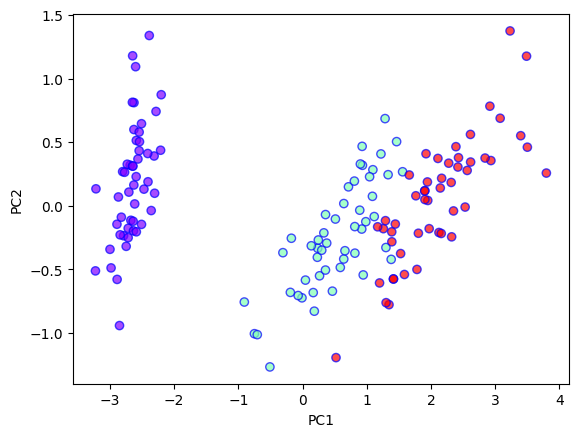

In [ ]:
pca = PCA(n_components=2) # PCA model from sklearn
X_pca = pca.fit_transform(X)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Kernel PCA

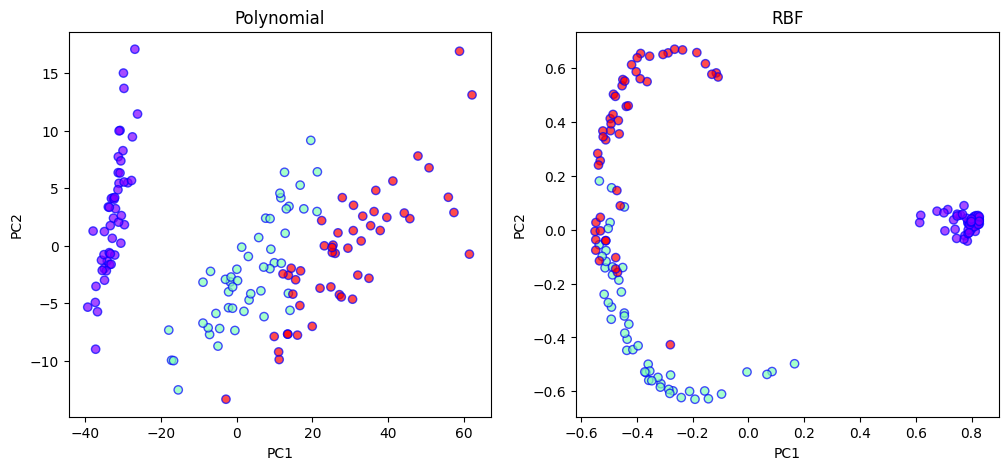

In [ ]:
# Polynomial Kernel using sklearn
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(X)

# RBF Kernel using sklearn
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_kpca_rbf = kpca_rbf.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Polynomial")
ax[0].scatter(
    X_kpca_poly[:,0],
    X_kpca_poly[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("RBF")
ax[1].scatter(
    X_kpca_rbf[:,0],
    X_kpca_rbf[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

X2 shape = (150, 21)


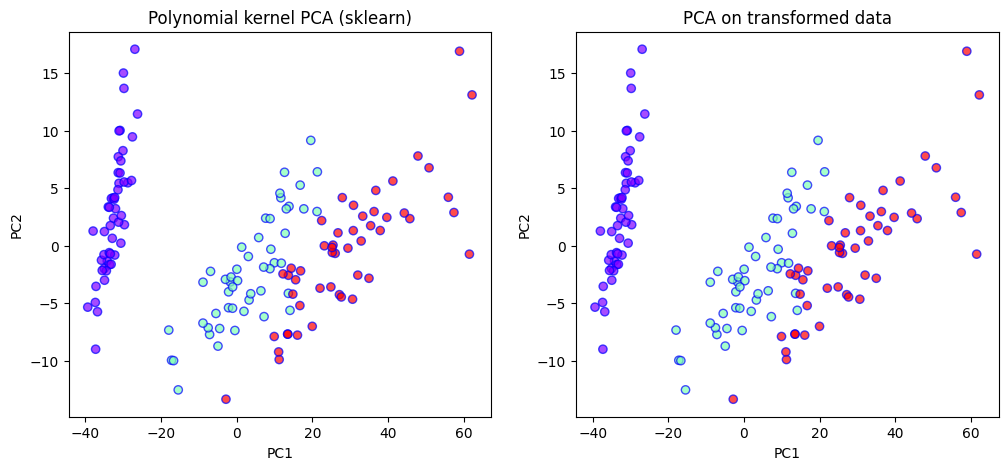

In [21]:
# Transform the data according to the polynomial map
X2 = np.concatenate((0.5*np.ones((X.shape[0],1)),X,np.einsum("ij, ik->ijk", X, X).reshape(X.shape[0],-1)),axis=1)
print("X2 shape =", X2.shape) # the number of features is now 21

# Perform PCA on the transformed data
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Polynomial kernel PCA (sklearn)")
ax[0].scatter(
    X_kpca_poly[:,0],
    X_kpca_poly[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("PCA on transformed data")
ax[1].scatter(
    X2_pca[:,0],
    X2_pca[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

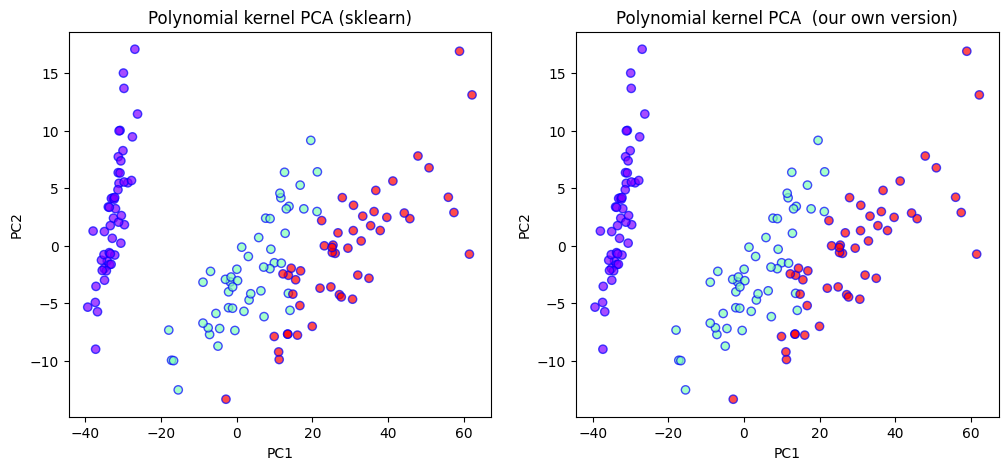

In [22]:
# Construct the kernel
def make_polykernel(X, degree=2, gamma=1.0, coef0=0.5):
    K = X.dot(X.T)
    K *= gamma
    K += coef0
    K **= degree
    return K

# Kernel PCA
def polykernel_pca(X, n=2, degree=2, gamma=1.0, coef0=0.5):
    K = make_polykernel(X, degree=degree,
                        gamma=gamma, coef0=coef0)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N

    # This step helps to standardise the data to have zero mean (c.f. PCA)
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Get the eigenvalues/eigenvectors
    _, eigen_values, eigen_vectors = svd(K)
    return (eigen_vectors[:n, :].T * np.sqrt(np.abs(eigen_values[:n])))

X2_transformed = polykernel_pca(X, degree=2, gamma=1, coef0=0.5)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Polynomial kernel PCA (sklearn)")
ax[0].scatter(
    X_kpca_poly[:,0],
    X_kpca_poly[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("Polynomial kernel PCA  (our own version)")
ax[1].scatter(
    X2_transformed[:,0],
    X2_transformed[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)